# 딥러닝 Deep Learning

In [1]:
#라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#tensorflow 버전 확인
tf.__version__

'2.11.1'

In [3]:
#데이터셋 불러오기 (sklearn 처럼 load_data로 데이터를 불러온다)
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#데이터 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

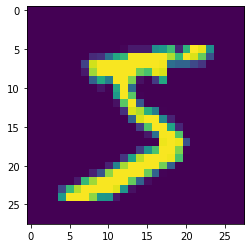

In [6]:
#이미지 확인
plt.imshow(X_train[0])

In [7]:
#label 확인
y_train[0]

5

### 그래도 확실히 5라고 단정짓기 어렵다. 그럼 이제 tensorflow를 활용해 이 숫자를 예측해보자.

## 1) 시퀀셜 모델
- flatten (한줄로 평평하계) : data 출력을 한줄로 펼쳐준다. 행렬을 하나의 행으로 표시
- dense (완전연결 레이어): layer이다. (unit, activation) unit은 생략 가능하며, 정해진 거 없다.
    - relu를 많이 쓴다 (0보다 작은건 다 0, 0보다 큰 값은 그 값으로 넣는 함수)
   
- 마지막 dense : 예측해야 되는 숫자가 0~10이니까 10이라고 쓴 것이고, softmax는 결과가 [0.1, 0.3, 0.6] 등 합이 1인 확률값으로 나옴
    - 이 중 가장 큰 확률값을 선택하게 된다

In [8]:
#모델 만들기
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
])

In [9]:
#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


* Output Shape = 28x28 = 784

## 2) 모델 컴파일
- 아래 세가지 변수를 설정해준다
- optimizer : adam을 주로 많이 쓴다. adam이 성능이 좋대
- loss : 다중 분류
- metrics : 정확도, R2 이런거 확인

In [10]:
#컴파일
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 3) 학습
- fit(X_train, y_train, epochs=5)
- epochs : 전체 데이터가 5번 학습된다. 

In [11]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4726 - accuracy: 0.8903
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3289 - accuracy: 0.9272
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2721 - accuracy: 0.9363
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2366 - accuracy: 0.9438
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2261 - accuracy: 0.9473


* Epoch 1/5 : 몇번째 학습인지
* 1875 : 60,000개 데이터 아니라, 기본 batch 사이즈가 32이므로 그걸 나누면 1875개로 나옴
* loss : 오차 (점점 낮아짐)
* accuracy : 정확도 (점점 올라감)

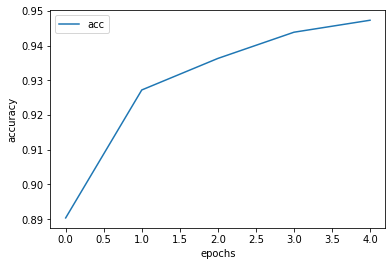

In [12]:
#학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

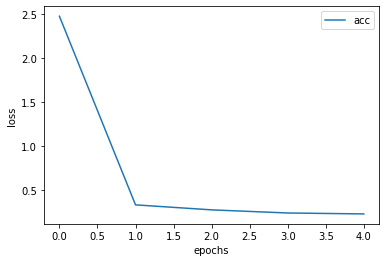

In [13]:
#학습 정확도 (epoch에 따른 loss 변화)
plt.plot(history.history['loss'], label='acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

 ---

# 실습
# 1) fashion_mnist 데이터

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
#정규화 (0~1) 255픽셀이니까요!
X_train, X_test = X_train/255.0, X_test/255.0

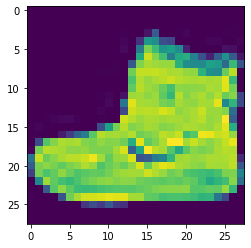

In [17]:
#이미지 확인
plt.imshow(X_train[0])

In [18]:
#label 확인
y_train[0]

9

* 이렇게만 나오면 무슨 품목인지 모르니까, 이름으로 출력되도록 하자

In [19]:
#label 이름 확인
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classes[y_train[0]])

Ankle boot


* 그럼 이번엔 다른 데이터

T-shirt/top


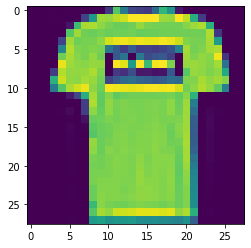

In [20]:
print(classes[y_train[1]])
plt.imshow(X_train[1])

* 오케이, 좋아. 그러면 이제 시퀀셜 모델을 만들어서 한 번 tensowflow로 예측을 해보자

In [21]:
#모델
#- Dense : 완전연결
#- Dropout : percent를 정할 수 있다 (0.5라고 하면, 2개는 연결하고 2개는 랜덤하게 생략시켜서, 과적합을 방지하는 효과가 있다)

from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

#컴파일
#- sparse가 왜 붙냐 : 지금 레이블은 자연수로 되어있으니까 sparse필요한데, 
#만약 원핫인코딩돼서 0,0,1,0 식이면 sparse라는 단어 필요없이 categorical_crossentropy만 넣어주면 됨
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
#학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5260 - accuracy: 0.8132 - val_loss: 0.4130 - val_accuracy: 0.8533
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3991 - accuracy: 0.8555 - val_loss: 0.3961 - val_accuracy: 0.8576
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3639 - accuracy: 0.8680 - val_loss: 0.3771 - val_accuracy: 0.8655
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3447 - accuracy: 0.8736 - val_loss: 0.3530 - val_accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3310 - accuracy: 0.8775 - val_loss: 0.3411 - val_accuracy: 0.8795
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3173 - accuracy: 0.8825 - val_loss: 0.3411 - val_accuracy: 0.8780
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3028 - accuracy: 0.8874 - val_loss: 0.3506 - val_accuracy:

* history 변수에 학습과정을 저장하는 이유는, 아래에서 그림으로 그려보기 위함이다
* train loss는 무조건 떨어질텐데, 우리가 중요하게 봐야할 것은 validation_loss이다. 떨어지다가 다시 튀어오를 수도 있으니까.
* accuracy도 validation으로 확인해야 한다

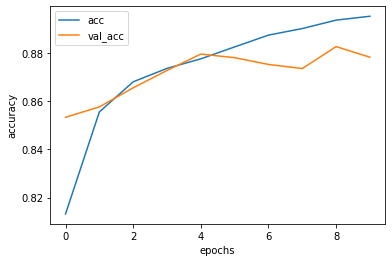

In [23]:
#시각화 accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

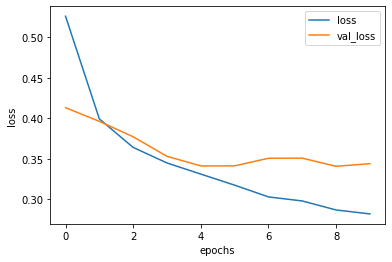

In [24]:
#시각화 loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### 이제 예측을 해보자!

In [25]:
pred = model.predict(X_test)
pred[1]

313/313 [==============================] - 1s 1ms/step


array([3.2296950e-05, 8.6906457e-18, 9.9991053e-01, 1.3597987e-12, 2.7038152e-05, 2.4457223e-19, 3.0060115e-05,
       7.0428200e-24, 1.5020138e-12, 3.4282814e-20], dtype=float32)

In [26]:
#가장 높은 값 찾기 (np.argmax()는 데이터 중 가장 높은 인덱스값을 반환한다)
np.argmax(pred[1])

2

In [27]:
#예측한 label
classes[np.argmax(pred[1])]

'Pullover'

In [28]:
#실제 label
classes[y_test[1]]

'Pullover'

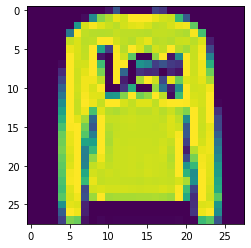

In [29]:
#이미지 확인
plt.imshow(X_test[1])

# CNN 을 활용한 이미지 분류
- CNN : Convolution Neural Network

In [30]:
#라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

#데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#shape변경 (Convolusion layer에 넣기 위해서는 reshape이 필요하다)
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

#정규화 (0~1)
X_train, X_test = X_train/255.0, X_test/255.0

#모델
model = Sequential([
                    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2,2)),
                    Conv2D(64, (3,3), activation='relu',),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(64, activation='relu',),
                    Dense(10, activation='softmax')
])

#컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

* Conv2D + MaxPooling2D를 같이 짝꿍처럼 묶어서 쓴다

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

* (None, 11, 11, 64) : (11x11) 행렬이 64개 있다는 말 
* flatten : 5x5x64 = 1600으로 한줄로 쭉 펼쳐지는 것

In [32]:
#학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 134s 71ms/step - loss: 0.4712 - accuracy: 0.8293 - val_loss: 0.3968 - val_accuracy: 0.8579
Epoch 2/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.3174 - accuracy: 0.8852 - val_loss: 0.3140 - val_accuracy: 0.8872
Epoch 3/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.2698 - accuracy: 0.9020 - val_loss: 0.2991 - val_accuracy: 0.8911
Epoch 4/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2387 - accuracy: 0.9129 - val_loss: 0.2767 - val_accuracy: 0.8979
Epoch 5/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2133 - accuracy: 0.9214 - val_loss: 0.2713 - val_accuracy: 0.9021


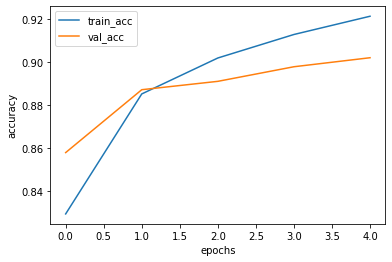

In [33]:
#시각화 accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

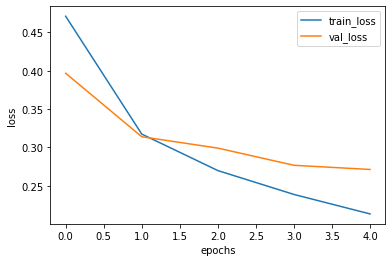

In [34]:
#시각화 loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()